# TF Lite model maker example test 

In [1]:
import os
import numpy as np
import tensorflow as tf
print('tf version = ' + tf.__version__ ) 

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

tf version = 2.6.0


## Data loading

In [2]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

In [3]:
data = DataLoader.from_folder(image_path, shuffle=False) # By default this will shuffle the data
train_data, rest_data = data.split(0.8)
validation_data, test_data = data.split(0.5)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


## Model spec and creation
Uses pre-existing and pre-trained models. 
The .create will do the training.


In [4]:
#model = image_classifier.create(train_data, validation_data=validation_data, train_whole_model=True)
resnet = image_classifier.EfficientNetLite1Spec(name='effnetlite_1')
model = image_classifier.create(train_data, model_spec=resnet, validation_data=validation_data, epochs = 1, learning_rate=0.1)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 4,195,749
Trainable params: 6,405
Non-trainable params: 4,189,344
_________________________________________________________________
None


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


91/91 [==============================] - 70s 755ms/step - loss: 2.6380 - accuracy: 0.7740 - val_loss: 4.0708 - val_accuracy: 0.6217


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              4189344   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 4,195,749
Trainable params: 6,405
Non-trainable params: 4,189,344
_________________________________________________________________


## Evaluate

In [9]:
loss, accuracy = model.(test_data)
print(loss)
print(accuracy)

TypeError: evaluate_tflite() missing 1 required positional argument: 'data'

In [7]:
predicts = model.predict_top_k(test_data)
len(predicts) == len(test_data)

True

TFLite code example to verify the predictions.

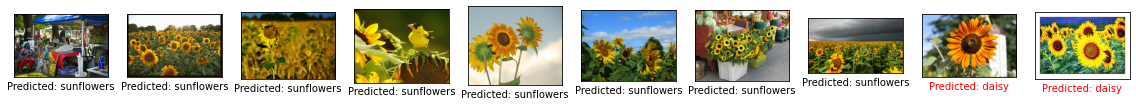

In [8]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(10)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()